# EDA - Détails des Communes du Togo

Ce notebook présente une Analyse Exploratoire des Données (EDA) pour le dataset `details_communes.csv`. L'objectif est de comprendre les caractéristiques géographiques et démographiques des communes togolaises (densité de population, superficie, altitude, etc.).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuration du style des graphiques
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Chargement et Aperçu des Données

In [18]:
# Chargement du dataset
df_communes = pd.read_csv('../../data_raw/details_communes.csv')
df_communes.head()

,commune_id,commune,prefecture,region,latitude,longitude,altitude_m,superficie_km2,population_densite,code_postal,type_commune,distance_capitale_km,zone_climatique
0,COM001,Vogan,Vo,Maritime,6.2295,1.5040,19,343,35,BP 272,Rurale,34,Côtière
1,COM002,Hahotoé,Vo,Maritime,6.6892,1.6588,39,398,210,BP 239,Semi-urbaine,79,Côtière
2,COM003,Anyronkopé,Vo,Maritime,6.4158,1.2398,47,215,76,BP 495,Rurale,31,Côtière
3,COM004,Momé,Vo,Maritime,6.2023,1.6180,41,230,95,BP 60,Rurale,45,Côtière
4,COM005,Dagbati,Vo,Maritime,6.3068,1.6507,25,318,58,BP 235,Rurale,52,Côtière


In [5]:
# Informations générales
df_communes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   commune_id            200 non-null    object 
 1   commune               200 non-null    object 
 2   prefecture            200 non-null    object 
 3   region                200 non-null    object 
 4   latitude              200 non-null    float64
 5   longitude             200 non-null    float64
 6   altitude_m            200 non-null    int64  
 7   superficie_km2        200 non-null    int64  
 8   population_densite    200 non-null    int64  
 9   code_postal           200 non-null    object 
 10  type_commune          200 non-null    object 
 11  distance_capitale_km  200 non-null    int64  
 12  zone_climatique       200 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 20.4+ KB


In [6]:
# Statistiques descriptives
df_communes.describe()

,latitude,longitude,altitude_m,superficie_km2,population_densite,distance_capitale_km
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,8.153211,1.059142,290.525000,362.885000,208.610000,229.715000
std,1.513130,0.365370,205.517827,130.180477,569.698243,166.393624
min,6.112500,0.006700,8.000000,102.000000,20.000000,3.000000
25%,6.652650,0.840575,67.000000,249.750000,43.750000,67.250000
50%,7.759900,1.150050,283.500000,351.500000,77.000000,183.500000
75%,9.561700,1.314600,443.500000,479.000000,155.250000,381.000000
max,11.032300,1.688700,783.000000,600.000000,4690.000000,556.000000


## 2. Analyse de la Qualité des Données (Cleanliness Check)

In [7]:
# Vérification des valeurs manquantes
missing_values = df_communes.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values[missing_values > 0])

# Vérification des doublons
duplicates = df_communes.duplicated().sum()
print(f"\nNombre de doublons : {duplicates}")

Valeurs manquantes par colonne :
Series([], dtype: int64)

Nombre de doublons : 0


## 3. Analyse Univariée

### Répartition des Types de Communes

C:\Users\RIG\AppData\Local\Temp\ipykernel_18692\2032698446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type_commune', data=df_communes, palette='pastel')


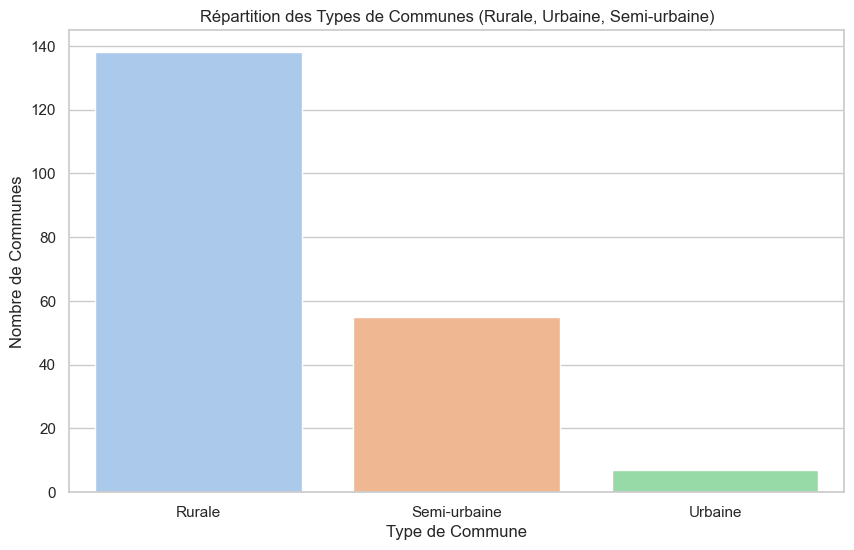

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type_commune', data=df_communes, palette='pastel')
plt.title('Répartition des Types de Communes (Rurale, Urbaine, Semi-urbaine)')
plt.xlabel('Type de Commune')
plt.ylabel('Nombre de Communes')
plt.show()

### Distribution de la Densité de Population

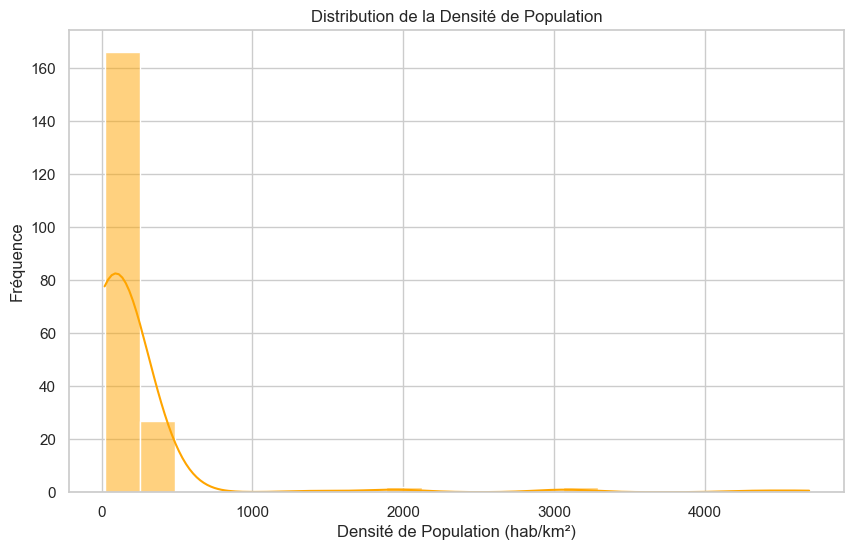

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df_communes['population_densite'], kde=True, bins=20, color='orange')
plt.title('Distribution de la Densité de Population')
plt.xlabel('Densité de Population (hab/km²)')
plt.ylabel('Fréquence')
plt.show()

### Distribution des Zones Climatiques

C:\Users\RIG\AppData\Local\Temp\ipykernel_18692\3091499245.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='zone_climatique', data=df_communes, palette='coolwarm')


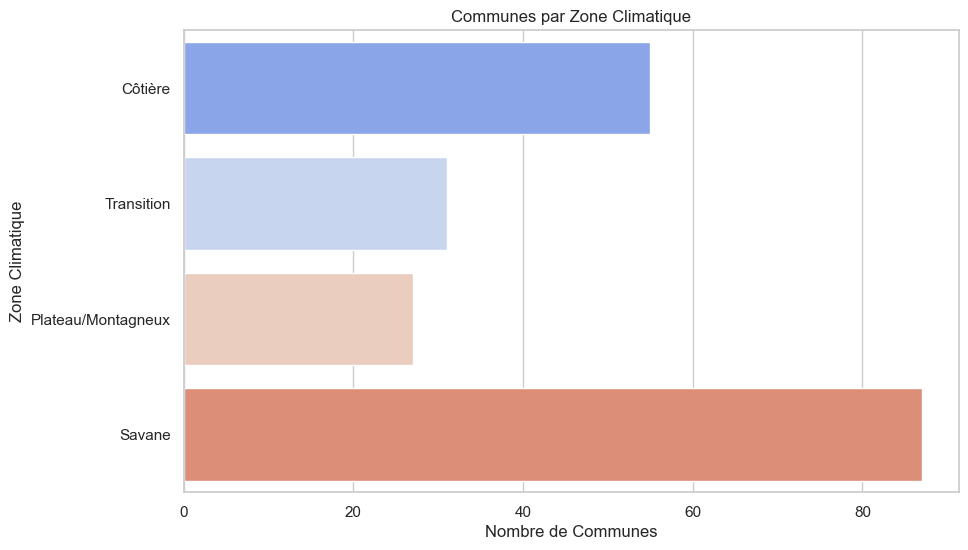

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(y='zone_climatique', data=df_communes, palette='coolwarm')
plt.title('Communes par Zone Climatique')
plt.xlabel('Nombre de Communes')
plt.ylabel('Zone Climatique')
plt.show()

## 4. Analyse Bivariée et Géographique

### Altitude par Région

C:\Users\RIG\AppData\Local\Temp\ipykernel_18692\2977008914.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='altitude_m', data=df_communes, palette='viridis')


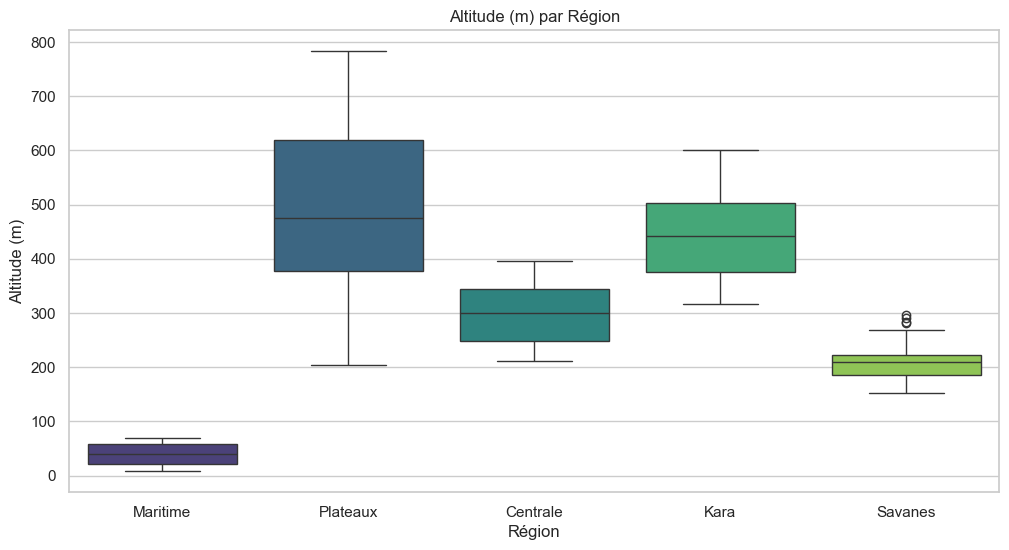

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='altitude_m', data=df_communes, palette='viridis')
plt.title('Altitude (m) par Région')
plt.xlabel('Région')
plt.ylabel('Altitude (m)')
plt.show()

### Densité de Population vs Distance à la Capitale

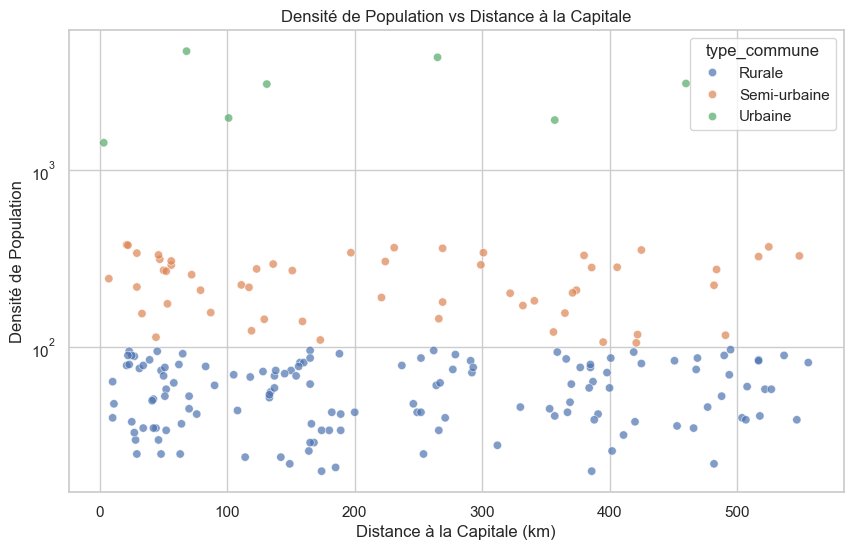

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_capitale_km', y='population_densite', hue='type_commune', data=df_communes, alpha=0.7)
plt.title('Densité de Population vs Distance à la Capitale')
plt.xlabel('Distance à la Capitale (km)')
plt.ylabel('Densité de Population')
plt.yscale('log') # Echelle log pour mieux voir les écarts
plt.show()

### Carte des Communes (Latitude/Longitude)

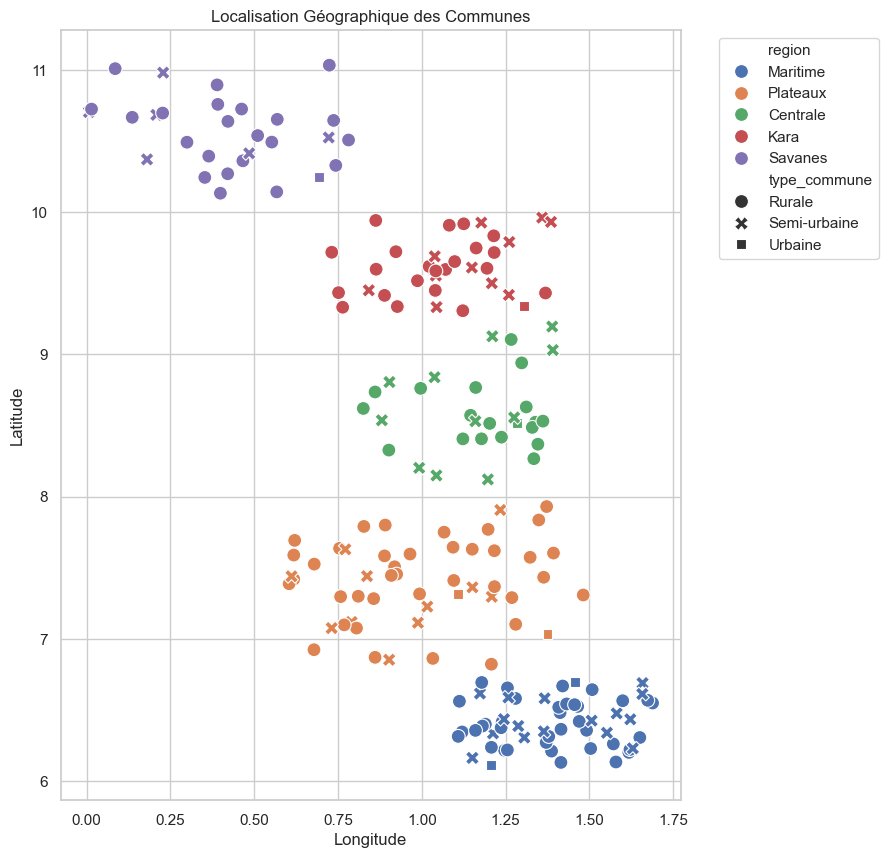

In [13]:
plt.figure(figsize=(8, 10))
sns.scatterplot(x='longitude', y='latitude', hue='region', style='type_commune', data=df_communes, s=100)
plt.title('Localisation Géographique des Communes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

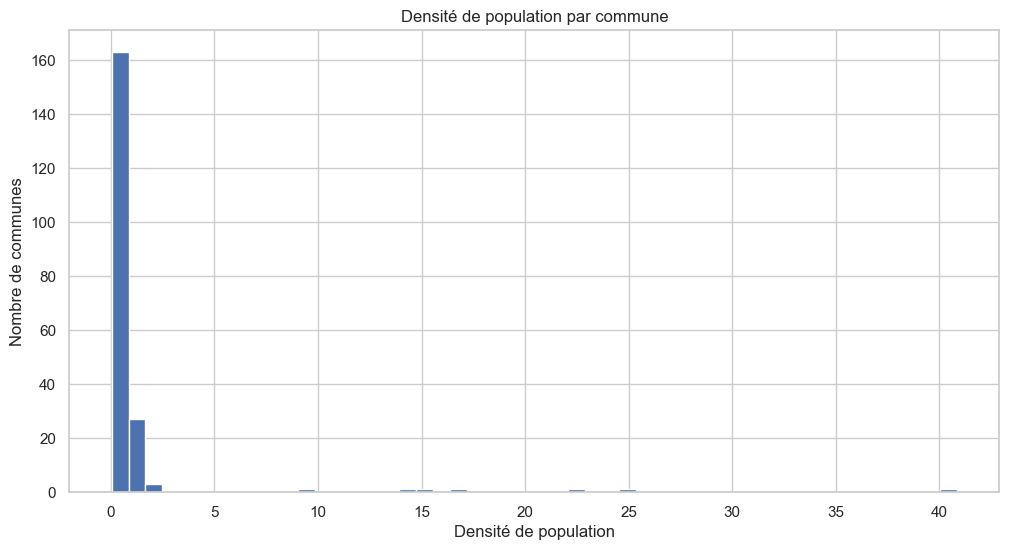

In [ ]:
#densité de population par commune
#commune en x et en y nuous avons la densité et la superficie 



In [ ]:
# save the cleaned data
#cette donnée est deja propre donc on va la sauvegarder
import os 
import sys  
# 1. Ajout du chemin au système
module_path = r"D:\public_services_optimization_togo\02_Nettoyage_et_Preparation_des_Donnees"
if module_path not in sys.path:
    sys.path.append(module_path)
df_communes.to_csv(r"D:\public_services_optimization_togo\02_Nettoyage_et_Preparation_des_Donnees\data_cleaned\details_communes_cleaned.csv", index=False)